In [3]:
from dataloader import dataset_factory
from utils import arguments
import matplotlib.pyplot as plt
import numpy as np
import torch

opt = arguments.DAE_Option()
ds = dataset_factory.get_dataset(opt, super_res=True)

/media/DATA/martina_ma/datasets/test_csv.csv


In [6]:
ds[0]


def show(*img):
    img = [i if len(i.shape) == 3 else i.squeeze(0) for i in img]
    img = [(i.detach().cpu() if isinstance(i, torch.Tensor) else torch.from_numpy(i)) for i in img]
    np_img = torch.cat(img, dim=-1).numpy()
    plt.figure(figsize=(20, 6))
    plt.imshow(np.transpose(np_img, (1, 2, 0)), interpolation="nearest", cmap="gray")


""
show(*ds.get_img(9, 1).values())

(128, 128, 128)


TypeError: Dataset_CSV.__getitem__() takes 2 positional arguments but 3 were given

In [2]:
from pl_models.DEA import DAE_LitModel
checkpoint = "lightning_logs/DAE_NAKO_256/version_37/checkpoints/last.ckpt"
model: DAE_LitModel = DAE_LitModel.load_from_checkpoint(checkpoint)#"lightning_logs/SuperDAE_DAE_NAKO_256/version_1/checkpoints/last.ckpt")

FileNotFoundError: [Errno 2] No such file or directory: '/media/DATA/martina_ma/dae/lightning_logs/DAE_NAKO_256/version_37/checkpoints/last.ckpt'

In [164]:
device = torch.device("cuda:0")
data = ds.get_img(8, 0)
img_lr: torch.Tensor = data["img_lr"]
img_lr.unsqueeze_(0)
img_lr = img_lr.to(device)
img_hr = data["img"]
img_hr.unsqueeze_(0)

cond = model.encode(img_lr)

xT = model.encode_stochastic(img_lr, cond, T=250)
pred = model.render(xT, cond, T=20)
pred2 = model.render(torch.randn_like(img_lr), cond, T=20)
pred3 = model.render(xT * 0.2, cond, T=20)

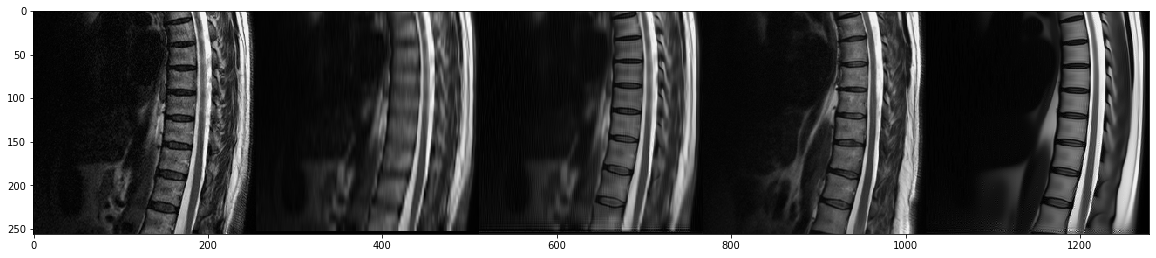

In [148]:
show(img_hr, img_lr, pred, pred2, pred3)

In [ ]:
print(xT.min(), xT.max())
n = torch.randn_like(img_lr)
print(n.min(), n.max())

In [133]:
from BIDS import NII

nii = NII.load(
    "/media/data/robert/datasets/dataset-neuroboly/rawdata/sub-m034619/ses-20140114/anat/sub-m034619_ses-20140114_acq-ax_chunk-2_T2w.nii.gz",
    False,
)
nii.reorient_().rescale_((0.8571, 0.8571, 0.8571))

# show(arr)

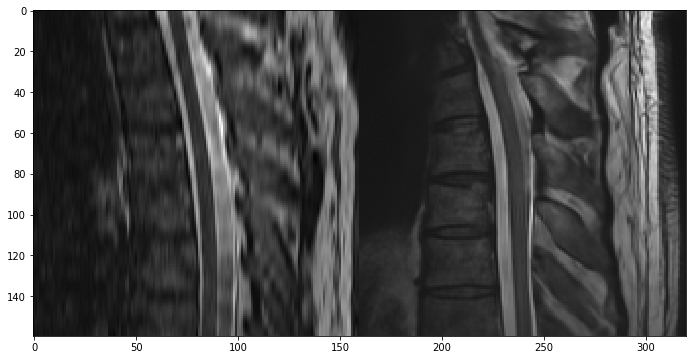

In [141]:
arr_new = nii.get_array()[:, :, nii.shape[-1] // 2]
from dataloader.datasets.dataset_superres import get_pads, target_pad

arr, _ = target_pad(arr_new, [160, 160])
a = 50
arr = arr[a : 160 + a, :160]


img_lr = torch.from_numpy(arr.T).unsqueeze_(0).unsqueeze_(0).to(device, torch.float32)
img_lr /= img_lr.max()
img_lr = img_lr * 2 - 1
cond = model.encode(img_lr)
pred2 = model.render(torch.randn_like(img_lr), cond, T=20)
show(img_lr.cpu().numpy(), pred2.cpu().numpy())

In [112]:
print(nii.shape)
print(nii.orientation)

(275, 188, 275)
('P', 'I', 'R')


In [163]:
a = 90

show(img_lr[..., :160, a : 160 + a])

ValueError: axes don't match array

<Figure size 1440x432 with 0 Axes>